<FONT COLOR="RED" SIZE="6">FEATURE SELECTION: Wrapper Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">2_Sequential_Feature_Selection_Forward</FONT>

Sequential Feature Selection (SFS) is a technique used to identify the most relevant features for a model by iteratively adding or removing features based on performance.
<b>Steps:</b>
<ol>
<li> Load the Wine dataset.</li>
  <li>  Split the data into training and testing sets.</li>
   <li> Apply SFS using a classifier (e.g., logistic regression or random forest).</li>
   <li> Visualize the performance as a function of the number of selected features.</li></ol>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np

In [2]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

In [6]:
# Perform Sequential Feature Selection
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", direction="forward", scoring="accuracy", cv=5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          scoring='accuracy')

In [8]:
# Get the selected features
selected_features = sfs.get_support()
selected_feature_names = np.array(feature_names)[selected_features]

In [9]:
# Evaluate performance with the selected features
clf.fit(X_train[:, selected_features], y_train)
accuracy = clf.score(X_test[:, selected_features], y_test)
print(f"Test accuracy with selected features: {accuracy:.2f}")

Test accuracy with selected features: 0.96


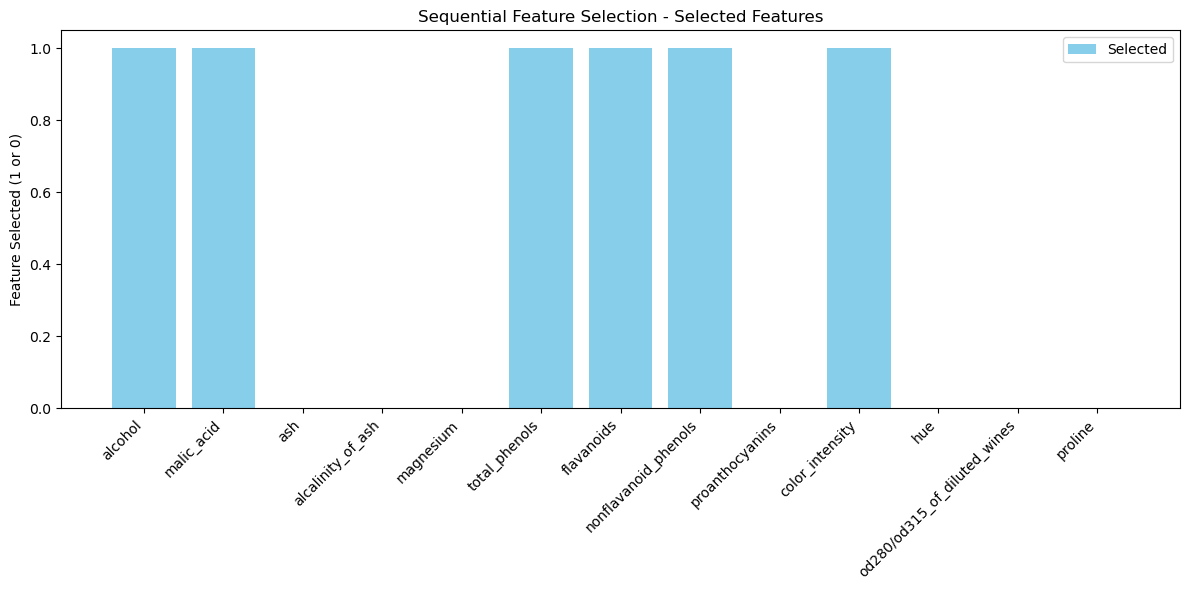

In [10]:
# Plot feature selection results
feature_indices = np.arange(len(feature_names))
plt.figure(figsize=(12, 6))
plt.bar(feature_indices, sfs.support_, color="skyblue", label="Selected")
plt.xticks(feature_indices, feature_names, rotation=45, ha="right")
plt.ylabel("Feature Selected (1 or 0)")
plt.title("Sequential Feature Selection - Selected Features")
plt.legend()
plt.tight_layout()
plt.show()